In [1]:
import numpy as np
import pandas as pd
import re
import os
import datetime
from itertools import combinations
!pip install patool
import patoolib
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from plotly import tools
!pip install chart_studio
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)




In [2]:
# Changing wd as a main_path and then extracting Data_Analyst.rar file 

print(f"old_directory : {os.getcwd()}")
os.chdir(os.path.dirname(os.getcwd()))
new_path = os.getcwd()
print(f"new path: {new_path}")

foldr_names=[name for name in os.listdir(new_path) if os.path.isdir(name)]
foldr_names

old_directory : C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test\Code
new path: C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test


['Code', 'Report']

In [3]:
if 'Data' in foldr_names:
    pass
else:
    fil=[name for name in os.listdir(new_path) if ".rar" in name]
    patoolib.extract_archive(os.path.join(new_path,fil[0]) , outdir=os.getcwd())

patool: Extracting C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test\Data Analyst.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test\Data Analyst.rar"
patool:     with cwd="C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test"
patool: ... C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test\Data Analyst.rar extracted to `C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test'.


In [4]:
# Searching for Data Anlyst folder and making that a main directory 

foldr_name= [name for name in os.listdir(os.getcwd()) if (("Data" in name) & (os.path.isdir(name))) ] 
os.chdir(os.path.join(os.path.join(os.getcwd(),foldr_name[0])))

In [5]:
foldr_names=[name for name in os.listdir(os.getcwd())]
if 'EDA.csv' in foldr_names:
    pass
else:
    fil=[name for name in os.listdir(os.getcwd()) if ".rar" in name]
    patoolib.extract_archive(os.path.join(os.getcwd(),fil[0]) , outdir=os.getcwd())

patool: Extracting C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test\Data Analyst\EDA-TEST.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test\Data Analyst\EDA-TEST.rar"
patool:     with cwd="C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test\Data Analyst"
patool: ... C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test\Data Analyst\EDA-TEST.rar extracted to `C:\Users\amith\OneDrive - Multi-Act Trade and Investments Pvt. Ltd\Desktop\Python\Edelwiss_test\Data Analyst'.


##  Section A

1. Write a function “cap_first_let” to capitalize the first letter of word in a given string. The functions should also remove any non-alphabetic characters. 

2. Write a function to return unique pairs of numbers that are K-complementary in a given array. Given an array A, pair(A[i],A[j]) is K-complementary if A[i]+A[j] = K . 

3. Given a directory, write a function to count the no of text files (.txt) in the directory and its subdirectories 
 


In [8]:

#1
def cap_first_let(text: str):
    """
    input :- text ( should be passed in str format ex. "we are 12the b#st" )
    output :- text ( would return the text eliminating the numbers and special char )
    """
    regex = re.compile('[a-zA-Z\s]')
    txt = regex.sub('', text).title()
    return txt



# 2

def get_k_comp_pair(arry,k):
    """
    input 
    arry :- int (Should pass list of same )
    k :- int
    output :- list of tuples
    """
    arry= pd.to_numeric(arry)
    g=[]
    for i in range(0,len(arry)-1):
        for j in range((i+1),len(arry)):
                if arry[i]+arry[j]==k:
                    g.append((arry[i],arry[j]))
    return set(g)

#3
def no_of_txt_files(path):
    """
    input :- text ( directory path should be passed in str format  )
    output :- int ( would return the count of total text file in directory + sub_directory )
    """
    no_of_txt_files= len([file for root,dirs,files in os.walk(path) for file in files if file.endswith('.txt') ])
    return no_of_txt_files

In [7]:
d= pd.to_numeric(["1","22","44","0"])
for i in d:
    print(i)

1
22
44
0


#### Verification of Section A

In [3]:
#1
cap_first_let("thiS IS %$@ Test STr#ing")

'%$@#'

In [4]:
a="thiS IS %$@ Test STr#ing"
regex = re.compile('[a-zA-Z\s]')

In [5]:
regex.sub('', a)

'%$@#'

In [9]:
#2
d=get_k_comp_pair(("1","3","4","5","3","-1"), 4)
d

{(1, 3), (5, -1)}

In [10]:
#3
no_of_txt_files(os.getcwd())

0

## Section 2

#### 1.	Import both the Data Sets “Cust_Data.csv” & “Cust_Demo.csv”. 

In [11]:
path= os.getcwd()
cus_data= pd.read_csv(os.path.join(path,"Cust_data.csv"))
cus_demo= pd.read_csv(os.path.join(path,"Cust_demo.csv"))

In [12]:
#Personal notes
"""
SeriosDlqin2yrs: Cust had been delinq more than 90days or worse in 2 yrs
NumberOfTime30_59DaysPastDueNotWorse : Cust had been delinq between 30-60days but not worse in 2 yrs
NumberOfTimes90DaysLate :Cust had been delayed  90 days but or more OVERALL
NumberOfTime60_89DaysPastDueNotWorse: Cust had been delinq between 60-90days but not worse in 2 yrs
DebtRatio  : (All the loans+ livng cost) / MOnthly income (personalnote: prob if >1)
NumberOfOpenCreditLinesAndLoans: no of loans and credit card
NumberRealEstateLoansOrLines : Number of mortgage and real estate loans including home equity lines of credit """

'\nSeriosDlqin2yrs: Cust had been delinq more than 90days or worse in 2 yrs\nNumberOfTime30_59DaysPastDueNotWorse : Cust had been delinq between 30-60days but not worse in 2 yrs\nNumberOfTimes90DaysLate :Cust had been delayed  90 days but or more OVERALL\nNumberOfTime60_89DaysPastDueNotWorse: Cust had been delinq between 60-90days but not worse in 2 yrs\nDebtRatio  : (All the loans+ livng cost) / MOnthly income (personalnote: prob if >1)\nNumberOfOpenCreditLinesAndLoans: no of loans and credit card\nNumberRealEstateLoansOrLines : Number of mortgage and real estate loans including home equity lines of credit '

####  2. Print the first 100 observations with “ID”, “SeriousDlqin2yrs” and “MonthlyIncome” variables from “Cust_Data” data set.

In [13]:
#2: 2.Print the first 100 observations with “ID”, “SeriousDlqin2yrs” and “MonthlyIncome” variables from “Cust_Data” data set. 
cus_data.loc[0:100,['ID','SeriousDlqin2yrs','MonthlyIncome']]

,ID,SeriousDlqin2yrs,MonthlyIncome
0,83236,0,11500.0
1,2503,0,14166.0
2,137013,0,6733.0
3,51306,0,13316.0
4,71937,0,2557.0
5,89149,0,NaN
6,140279,0,5000.0
7,123541,0,7000.0
8,47756,0,11833.0
9,112237,0,NaN


#### 3.	Convert “NumberOfDependents” and MonthlyIncome into Numeric variables and replace #N/A’s with missing values.


In [14]:
print(cus_data.isnull().sum())
cus_data.loc[cus_data['MonthlyIncome'].isnull(),['MonthlyIncome']]= round(np.nanmean(cus_data['MonthlyIncome']))
cus_data['MonthlyIncome']=cus_data['MonthlyIncome'].astype('Int64')
print("------------------------------")
print(cus_demo.isnull().sum())
cus_demo.loc[cus_demo['NumberOfDependents'].isnull(),['NumberOfDependents']]=round(np.nanmean(cus_demo['NumberOfDependents']))
cus_demo['NumberOfDependents']=cus_demo['NumberOfDependents'].astype('Int64')

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
NumberOfTime30_59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29711
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60_89DaysPastDueNotWorse        0
dtype: int64
------------------------------
ID                       0
Location                 0
Gender                   0
age                      0
Martial_Status           0
NumberOfDependents    3923
Own_House                0
No_Years_address         0
dtype: int64


#### 4.	Create new variable “Income bucket” using “Monthly Income” variable as follows. 


In [15]:
cus_data["Income_bucket"]=np.where(cus_data["MonthlyIncome"].between(min(cus_data["MonthlyIncome"]),100000),"<100000",
                          np.where(cus_data["MonthlyIncome"].between(100000,200000),"100000-200000",
                          np.where(cus_data["MonthlyIncome"].between(200000,500000),"200000-500000",
                          np.where(cus_data["MonthlyIncome"].between(500000,1000000),"500000-1000000",
                                   ">1000000"))))
# good way use pd.cut

In [16]:
cus_data.Income_bucket.value_counts()

<100000           149832
100000-200000         41
200000-500000         17
500000-1000000         8
>1000000               4
Name: Income_bucket, dtype: int64

#### 5	Create new variable “Life_Stage_bucket” using “Age” variable as follows. 


In [17]:

cus_demo["Life_Stage_bucket"] = np.where(cus_demo['age']<22,"Student", np.where(cus_demo['age'].between(23,27),"Unmarried_Employee",
                                     np.where(cus_demo['age'].between(27,40),"Married_with_young_kids",
                                     np.where(cus_demo['age'].between(41,60),"Pre-Retired","Retired"))))

In [18]:
cus_demo["Life_Stage_bucket"].value_counts()

Pre-Retired                69826
Retired                    45479
Married_with_young_kids    29538
Unmarried_Employee          4932
Student                      181
Name: Life_Stage_bucket, dtype: int64

#### 6.	Sort the data using monthly income and create data set with top 20 customers.


In [19]:
top_20_customer= cus_data.sort_values(["MonthlyIncome"],ascending=False).reset_index(drop=True)

In [20]:
top_20_customer.head(20)


,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Income_bucket
0,73764,0,0.007328,0,0.001470,3008750,10,0,1,0,>1000000
1,137141,0,0.000000,0,0.002776,1794060,15,0,1,0,>1000000
2,111366,0,0.163856,0,0.004013,1560100,12,0,4,0,>1000000
3,50641,0,0.469025,1,0.004537,1072500,9,0,2,0,>1000000
4,122544,0,0.041599,0,0.000147,835040,8,0,0,0,500000-1000000
5,123292,0,0.226333,1,0.005570,730483,23,0,1,0,500000-1000000
6,93565,0,0.071628,0,0.008268,702500,12,0,4,0,500000-1000000
7,96550,0,0.064155,0,0.003698,699530,11,0,2,0,500000-1000000
8,119137,0,0.151329,0,0.001313,649587,8,0,0,1,500000-1000000
9,37079,0,0.000000,0,0.000000,629000,3,0,0,0,500000-1000000


#### 7.	Create new data set (customer_360) using “Cust_demo” to “Cust_data” data like below.


In [21]:
pd.concat([cus_data, cus_demo], axis=0).sort_values('ID')

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Income_bucket,Location,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address,Life_Stage_bucket
15302,1,1.0,0.766127,2.0,0.802982,9120,13.0,0.0,6.0,0.0,<100000,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
76806,1,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,"Hyderabad,Andhra Pradesh",1.0,45.0,Single,2,0.0,2.0,Pre-Retired
138741,2,0.0,0.957151,0.0,0.121876,2600,4.0,0.0,0.0,0.0,<100000,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
126884,2,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,"Itanagar,Arunachal Pradesh",0.0,40.0,Married,1,1.0,2.0,Married_with_young_kids
6120,3,0.0,0.658180,1.0,0.085113,3042,2.0,1.0,0.0,0.0,<100000,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112560,149998,0.0,0.246044,0.0,3870.000000,6670,18.0,0.0,1.0,0.0,<100000,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
20322,149999,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,"Chandigarh,Haryana",1.0,30.0,Single,0,0.0,3.0,Married_with_young_kids
84656,149999,0.0,0.000000,0.0,0.000000,5716,4.0,0.0,0.0,0.0,<100000,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
116449,150000,0.0,0.850283,0.0,0.249908,8158,8.0,0.0,2.0,0.0,<100000,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


In [22]:
customer_360 = pd.merge(cus_data, cus_demo,  how="outer",on=['ID']).sort_values('ID').sort_values('ID').reset_index(drop=True)

In [23]:
#customer_360.indicator_column.value_counts()
customer_360.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Income_bucket,Location,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address,Life_Stage_bucket
0,1,1.0,0.766127,2.0,0.802982,9120,13.0,0.0,6.0,0.0,<100000,"Hyderabad,Andhra Pradesh",1.0,45.0,Single,2,0.0,2.0,Pre-Retired
1,2,0.0,0.957151,0.0,0.121876,2600,4.0,0.0,0.0,0.0,<100000,"Itanagar,Arunachal Pradesh",0.0,40.0,Married,1,1.0,2.0,Married_with_young_kids
2,3,0.0,0.658180,1.0,0.085113,3042,2.0,1.0,0.0,0.0,<100000,"Dispur,Assam",0.0,38.0,Single,0,0.0,3.0,Married_with_young_kids
3,4,0.0,0.233810,0.0,0.036050,3300,5.0,0.0,0.0,0.0,<100000,"Patna,Bihar",0.0,30.0,Single,0,1.0,1.0,Married_with_young_kids
4,5,0.0,0.907239,1.0,0.024926,63588,7.0,0.0,1.0,0.0,<100000,"Raipur,Chhattisgarh",1.0,49.0,Single,0,1.0,3.0,Pre-Retired


In [24]:
set1= set(cus_data.ID)
set2= set(cus_demo.ID)

In [25]:
set1.difference(set2)

{1015,
 5632,
 12337,
 14396,
 15331,
 16483,
 17002,
 23742,
 25295,
 26309,
 30066,
 31156,
 32347,
 34702,
 37987,
 48091,
 54606,
 55948,
 57333,
 58715,
 60966,
 63465,
 68442,
 71071,
 80419,
 82274,
 83907,
 85056,
 85742,
 98934,
 103853,
 106300,
 112838,
 113199,
 116379,
 116469,
 124995,
 128719,
 139073,
 142209,
 143991,
 144823,
 147804,
 149605}

####  8. From “Customer_360” data set 
-   create two data sets “delinquent customers” and “non_delinquent_customers” 
    separately using “SeriousDlqin2yrs” variable).
-   Also Export these data sets as “csv format” files.

In [26]:
# 8a
delinquent_customers= customer_360[customer_360.SeriousDlqin2yrs ==1]
non_delinquent_customers= customer_360[customer_360.SeriousDlqin2yrs ==0]

In [27]:
#8b
delinquent_customers.to_csv('delinquent_customers.csv',index=False)
non_delinquent_customers.to_csv('non_delinquent_customers.csv',index=False)

#### 9.	In “Customer_360” data set, split the “location” variable into two variables “City” & “State” .


In [28]:
customer_360[['City', 'State']]= customer_360["Location"].str.split(',', 1, expand=True)

In [29]:
customer_360.drop(columns =["Location"], inplace = True)

In [30]:
customer_360.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,Income_bucket,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address,Life_Stage_bucket,City,State
0,1,1.0,0.766127,2.0,0.802982,9120,13.0,0.0,6.0,0.0,<100000,1.0,45.0,Single,2,0.0,2.0,Pre-Retired,Hyderabad,Andhra Pradesh
1,2,0.0,0.957151,0.0,0.121876,2600,4.0,0.0,0.0,0.0,<100000,0.0,40.0,Married,1,1.0,2.0,Married_with_young_kids,Itanagar,Arunachal Pradesh
2,3,0.0,0.658180,1.0,0.085113,3042,2.0,1.0,0.0,0.0,<100000,0.0,38.0,Single,0,0.0,3.0,Married_with_young_kids,Dispur,Assam
3,4,0.0,0.233810,0.0,0.036050,3300,5.0,0.0,0.0,0.0,<100000,0.0,30.0,Single,0,1.0,1.0,Married_with_young_kids,Patna,Bihar
4,5,0.0,0.907239,1.0,0.024926,63588,7.0,0.0,1.0,0.0,<100000,1.0,49.0,Single,0,1.0,3.0,Pre-Retired,Raipur,Chhattisgarh


#### 10.	Create a single table with Top 10(in terms of monthly income) customers from each state.

In [31]:
top_n_evry_state= customer_360.groupby(['State','ID']).aggregate({'MonthlyIncome':'sum'}).reset_index().\
                    sort_values(['State','MonthlyIncome'],ascending=[True,False]).groupby('State').head(10)
top_n_evry_state.head(15)

,State,ID,MonthlyIncome
4066,Andhra Pradesh,93565,702500
3793,Andhra Pradesh,87280,140000
3745,Andhra Pradesh,86176,121200
4986,Andhra Pradesh,114725,78000
1772,Andhra Pradesh,40774,77000
1724,Andhra Pradesh,39670,73728
944,Andhra Pradesh,21713,69000
4508,Andhra Pradesh,103731,65000
4280,Andhra Pradesh,98487,61458
6149,Andhra Pradesh,141468,50500


####  11. Find the distribution of “Life_Stage_bucket”, “Income_bucket” and SeriousDlqin2yrs. hue='SeriousDlqin2yrs'


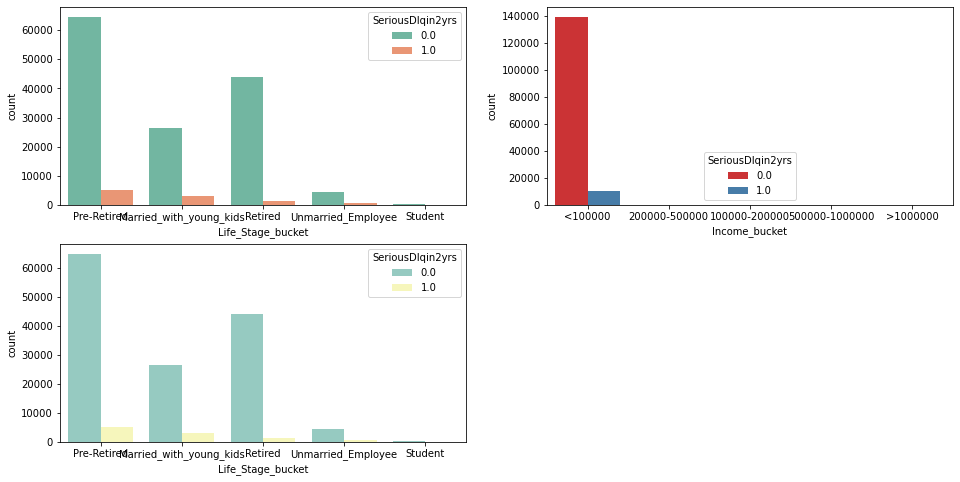

In [32]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.countplot(x ='Life_Stage_bucket', data = customer_360, hue='SeriousDlqin2yrs',palette = "Set2")
plt.subplot(2,2,2)
sns.countplot(x ='Income_bucket', data = customer_360, hue='SeriousDlqin2yrs',palette = "Set1")
plt.subplot(2,2,3)
sns.countplot(x ='Life_Stage_bucket', data = customer_360, hue='SeriousDlqin2yrs', palette = "Set3")
plt.show()

#### 12.	What is the % of customers are delinquent for the below combinations. 
-	Life_Stage_bucket = “Retired” and Income_bucket = “>1000000” 
-	State = “Andhra Pradesh” and Income_bucket = “<100000” 


In [33]:
#a
d=customer_360[(customer_360["Life_Stage_bucket"]=="Retired") & 
               (customer_360["Income_bucket"]==">1000000") &
              (customer_360['SeriousDlqin2yrs']==1)]
print(f"{len(d)*100} % of the people are Retired have income >1000000 and are delinquent")

0 % of the people are Retired have income >1000000 and are delinquent


- As 0% might seems really good but the fact is we dont have data of this group hence 0%

In [34]:
#b
target_people= len(customer_360[(customer_360["State"]=="Andhra Pradesh") & (customer_360["Income_bucket"]=="<100000") &
            (customer_360["SeriousDlqin2yrs"]>0)]) 
overall_group_no=len(customer_360[(customer_360["State"]=="Andhra Pradesh") & (customer_360["Income_bucket"]=="<100000")])

In [35]:
print(f"{round((target_people/overall_group_no)*100,2)} % of the people lives in Andra and have income <100000 and are delinquent")

7.23 % of the people lives in Andra and have income <100000 and are delinquent


#### 13.	What is the average, maximum, minimum, variance of income for the below combinations? 
- State & Life_stage_bucket 
- SeriousDlqin2yrs & Life_stage_bucket 


In [36]:
#a
d=customer_360.groupby(['State','Life_Stage_bucket']).agg({'MonthlyIncome':['min','max','mean','var']}).reset_index()
d.columns = [' '.join(col).strip() for col in d.columns.values]
d

,State,Life_Stage_bucket,MonthlyIncome min,MonthlyIncome max,MonthlyIncome mean,MonthlyIncome var
0,Andhra Pradesh,Married_with_young_kids,0,78000,5708.770963,2.233407e+07
1,Andhra Pradesh,Pre-Retired,0,702500,7214.866294,1.875992e+08
2,Andhra Pradesh,Retired,0,77000,6499.077626,2.216588e+07
3,Andhra Pradesh,Student,0,9686,2808.000000,1.213000e+07
4,Andhra Pradesh,Unmarried_Employee,0,12250,3118.126829,4.364710e+06
5,Arunachal Pradesh,Married_with_young_kids,0,78500,5382.226593,1.829514e+07
6,Arunachal Pradesh,Pre-Retired,0,76613,7142.526948,2.450641e+07
7,Arunachal Pradesh,Retired,0,582369,6735.618609,1.904575e+08
8,Arunachal Pradesh,Student,0,6670,2080.750000,9.512369e+06
9,Arunachal Pradesh,Unmarried_Employee,0,10000,3292.827586,5.054579e+06


In [37]:
#b
e= customer_360.groupby(['SeriousDlqin2yrs','Life_Stage_bucket']).agg({'MonthlyIncome':['min','count','max','mean','var']}).reset_index()
e.columns = [' '.join(col).strip() for col in e.columns.values]
e

,SeriousDlqin2yrs,Life_Stage_bucket,MonthlyIncome min,MonthlyIncome count,MonthlyIncome max,MonthlyIncome mean,MonthlyIncome var
0,0.0,Married_with_young_kids,0,26539,251608,5642.588756,2.304412e+07
1,0.0,Pre-Retired,0,64745,3008750,7466.954699,2.740919e+08
2,0.0,Retired,0,44062,1794060,6663.620875,1.372992e+08
3,0.0,Student,0,169,9686,2697.650888,7.440849e+06
4,0.0,Unmarried_Employee,0,4328,43000,3288.079482,6.359281e+06
5,1.0,Married_with_young_kids,0,2980,81000,5170.330201,2.053181e+07
6,1.0,Pre-Retired,0,5036,234600,6388.111001,3.331005e+07
7,1.0,Retired,0,1386,250000,6019.435786,5.867446e+07
8,1.0,Student,1000,12,6670,3442.750000,6.192647e+06
9,1.0,Unmarried_Employee,0,601,25000,3605.272879,5.943716e+06


#### 14.	Create format as follows and apply on Gender Variable. 
1- Male 
0- Female 

In [38]:

customer_360["Gender"]=np.where(customer_360["Gender"]>0,"Male","Female")

In [39]:
customer_360.Gender

0           Male
1         Female
2         Female
3         Female
4           Male
           ...  
149995    Female
149996      Male
149997    Female
149998      Male
149999    Female
Name: Gender, Length: 150000, dtype: object

#### 15.	Create tabular report as follows of %delinquent customers, average Monthly Income, maximum Debt Ratio and Average revolving   Utilization for the below combinations

- Rows – “Life stage Bucket” & “Gender” 
- Columns – “Martial Status” 

In [40]:

round(customer_360.groupby(["Life_Stage_bucket", "Gender","Martial_Status"]).agg({'RevolvingUtilizationOfUnsecuredLines':'mean',
                                                                           'MonthlyIncome':'mean',
                                                                           'DebtRatio':'mean'}).unstack(),2).reset_index()

Life_Stage_bucket  Gender RevolvingUtilizationOfUnsecuredLines        MonthlyIncome          DebtRatio        
Martial_Status                                                               Married Single       Married   Single   Married  Single
0               Married_with_young_kids  Female                                 7.64  11.43       5588.43  5609.21    219.34  227.20
1               Married_with_young_kids    Male                                 4.12   7.69       5585.89  5579.45    235.85  256.58
2                           Pre-Retired  Female                                 6.27   8.75       7240.91  7322.90    403.82  407.89
3                           Pre-Retired    Male                                 4.55   4.27       7192.84  7677.78    389.18  404.59
4                               Retired  Female                                 4.34   4.27       6485.40  6616.04    419.87  391.68
5                               Retired    Male                                 2.85   2.23       6843.18  6713.72    407.83  336.17
6                               Student  Female                                 0.65   0.61       3612.19  2311.06    119.71   15.36
7                               Student    Male                                 0.70   0.65       3558.23  2625.40     29.24   24.89
8                    Unmarried_Employee  Female                                 0.78   2.61       3332.99  3311.63     73.41   73.32
9                    Unmarried_Employee    Male                                13.20   1.77       3308.52  3354.89     61.66   64.76

#### 16.	Create summary report at “City”, “Gender” and “Marital Status” level with below requirements. 


In [41]:
""" a.	% of Delinquency 
    b.	Average Dependents 
    c.	Average Debt Ratio 
    d.	Maximum & Minimum monthly income 
    e.	Maximum & Minimum monthly age
"""

' a.\t% of Delinquency \n    b.\tAverage Dependents \n    c.\tAverage Debt Ratio \n    d.\tMaximum & Minimum monthly income \n    e.\tMaximum & Minimum monthly age\n'

In [42]:
h=customer_360.groupby(["City","Gender","Martial_Status"]).agg({'SeriousDlqin2yrs': ['sum','count'],
                                                             'NumberOfDependents':'mean',
                                                             'DebtRatio': 'mean',
                                                             'MonthlyIncome':['max','min'],
                                                             'age':['max','min']}).reset_index()

h.columns = [' '.join(col).strip() for col in h.columns.values]
h.columns = h.columns.str.replace(' ', '_')
h['%Delinquency']= round((h['SeriousDlqin2yrs_sum']/h['SeriousDlqin2yrs_count'])*100,2)
h

,City,Gender,Martial_Status,SeriousDlqin2yrs_sum,SeriousDlqin2yrs_count,NumberOfDependents_mean,DebtRatio_mean,MonthlyIncome_max,MonthlyIncome_min,age_max,age_min,%Delinquency
0,Agartala,Female,Married,19.0,387,0.801034,329.325343,44308,0,90.0,22.0,4.91
1,Agartala,Female,Single,53.0,970,0.761071,414.772112,50000,0,93.0,21.0,5.46
2,Agartala,Male,Married,38.0,543,0.845304,405.283231,32500,0,91.0,22.0,7.00
3,Agartala,Male,Single,88.0,1357,0.750921,337.525009,649587,0,97.0,21.0,6.48
4,Aizawl,Female,Married,103.0,1554,0.748391,333.286253,56033,0,109.0,21.0,6.63
5,Aizawl,Female,Single,260.0,3880,0.753866,390.780966,237490,0,103.0,21.0,6.70
6,Aizawl,Male,Married,19.0,309,0.750809,349.075407,66400,0,93.0,23.0,6.15
7,Aizawl,Male,Single,55.0,778,0.767352,313.741221,48700,0,101.0,22.0,7.07
8,Bangalore,Female,Married,86.0,1161,0.800687,332.413360,127400,0,92.0,21.0,7.41
9,Bangalore,Female,Single,198.0,2909,0.780831,346.305229,69000,0,103.0,21.0,6.81


## Section 3

- Would be Understanding the data and coming up with the insights

In [43]:
loan_default_data = pd.read_csv(os.path.join(path,'EDA.csv'))
loan_default_data.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


<a name='1'></a>
#### 1 -  Data Cleaning

</b></u>Following steps will be taken for our data-cleaning purpose:</b></u>

1.  Removing datapoints which doesn't contribute to predict or understand target variable
2.  Handling missing values from our datset 
3.  Irregularities handling like missing values , incorrect formats, outlier detection etc


##### 1.1 Removing datapoints which doesn't contribute to predict or understand target variable

- Following are the datapoints which would not help to predict or understand our target variable 
1. UniqueID 
2. branch_id
3. supplier_id
4. manufacturer_id
5. Current_pincode_ID
6. State_ID
7. Employee_code_ID
8. MobileNo_Avl_Flag

In [44]:
loan_default_data['MobileNo_Avl_Flag'].value_counts()

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

In [45]:
loan_default_data.drop(["UniqueID","branch_id",'supplier_id','manufacturer_id','Current_pincode_ID',
                        'State_ID','Employee_code_ID','MobileNo_Avl_Flag'],axis=1,inplace=True)

In [46]:
loan_default_data.shape

(233154, 33)

#### 1.2  Handling Missing Values

- Employment.Type has some value missing which needs to resolved hence replacing it by str "No-record"

In [47]:
loan_default_data.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT                      0
SEC.NO.OF.ACCTS                           0
SEC.ACTIVE.ACCTS                          0
SEC.OVERDUE.ACCTS                         0
SEC.CURRENT.BALANCE             

In [48]:
print(loan_default_data['Employment.Type'].value_counts())
loan_default_data['Employment.Type'].fillna("No_record", inplace = True)
print("-------------")
print(f"{loan_default_data['Employment.Type'].isnull().sum()} null values are currently present")

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64
-------------
0 null values are currently present


#### 1.3 - Irregularities handling

In [49]:
#changing date format of given colum and converting it into datetime object 
def convert_date_format(col):
    col= pd.to_datetime(col.apply(lambda x: datetime.datetime.strptime(x, "%d-%m-%y").strftime("%Y-%m-%d")))
    col= col.mask(col.dt.year.gt(2021), col - pd.offsets.DateOffset(years=100))  #solution for problems like 2068
    return col

loan_default_data[['Date.of.Birth','DisbursalDate']]=loan_default_data[['Date.of.Birth','DisbursalDate']].apply(convert_date_format)

#creating a new variable Customers age at the time of disburment
loan_default_data['Customer_age']=loan_default_data['DisbursalDate'].dt.year - loan_default_data['Date.of.Birth'].dt.year

#As we have created the age varibal these var is of no use for our target variable
loan_default_data.drop(['DisbursalDate','Date.of.Birth'],1,inplace=True)

#converting 0yrs 1mon like string to months and renaming the column for better understanding
def convert_str_dates(col):
    a= col.str.split(" ",n = 1,expand=True)[0].str.replace("yrs","").astype(int)*12
    b= col.str.split(" ",n = 1,expand=True)[1].str.replace("mon","").astype(int)
    col= a+b
    return col

loan_default_data[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']]=loan_default_data[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].apply(convert_str_dates)
    
loan_default_data.rename(columns= {'AVERAGE.ACCT.AGE':'AVERAGE.ACCT.AGE_in_months',
                                   'CREDIT.HISTORY.LENGTH':'CREDIT.HISTORY.LENGTH_in_months'}, inplace=True)

# formatting the columns
loan_default_data.columns= loan_default_data.columns.str.replace(".","_").str.lower()

loan_default_data.head()

,disbursed_amount,asset_cost,ltv,employment_type,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age_in_months,credit_history_length_in_months,no_of_inquiries,loan_default,customer_age
0,50578,58400,89.55,Salaried,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34
1,47145,65550,73.23,Self employed,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,33
2,53278,61360,89.63,Self employed,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
3,57513,66113,88.48,Self employed,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,25
4,52378,60300,88.39,Self employed,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,41


## 2. EDA

In [50]:
### seperating numerical and categorical data
df= loan_default_data.drop(['loan_default'],1).copy()
categorical_data= [i for i in df.columns if df[i].nunique()<=25]
numerical_data= [i for i in df.columns if df[i].dtypes != 'O' and i not in categorical_data]
print(categorical_data)
print("--------------------------")
print(numerical_data)

['employment_type', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score_description', 'pri_overdue_accts', 'sec_active_accts', 'sec_overdue_accts', 'delinquent_accts_in_last_six_months', 'no_of_inquiries']
--------------------------
['disbursed_amount', 'asset_cost', 'ltv', 'perform_cns_score', 'pri_no_of_accts', 'pri_active_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months', 'average_acct_age_in_months', 'credit_history_length_in_months', 'customer_age']


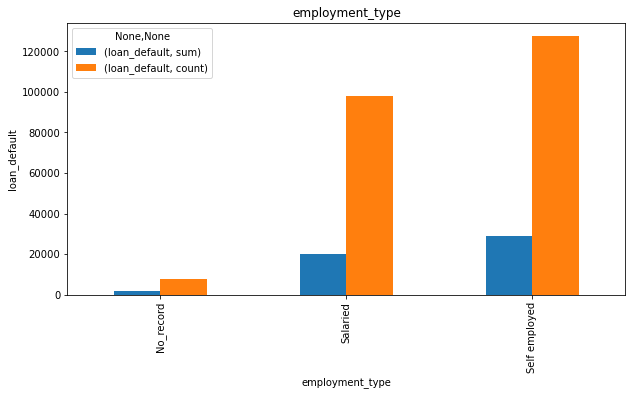

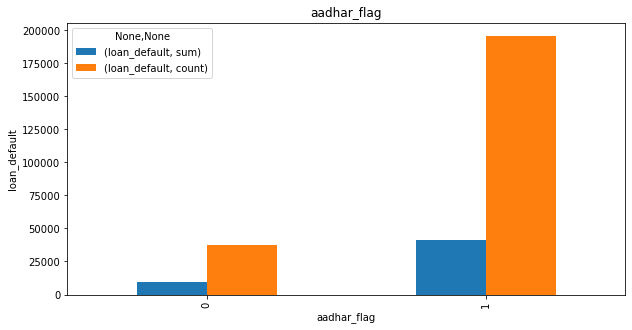

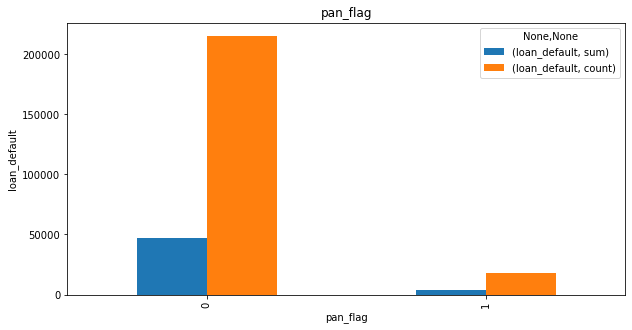

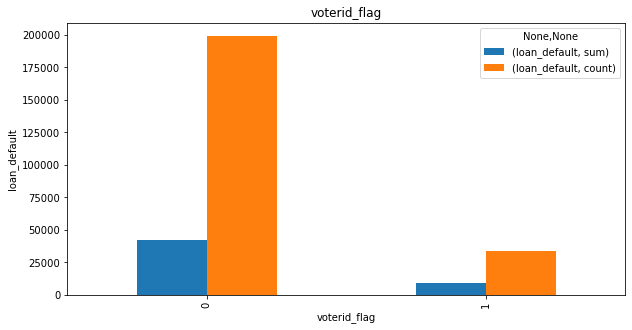

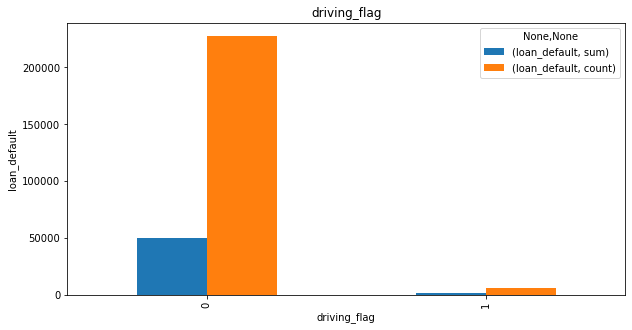

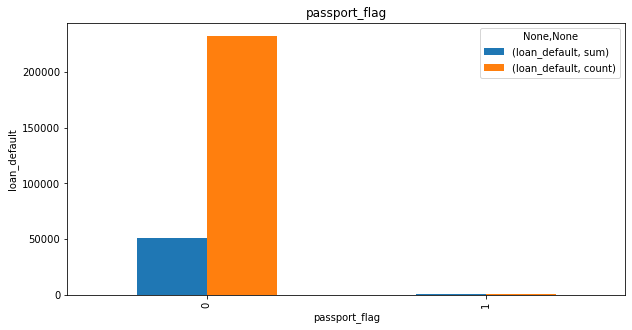

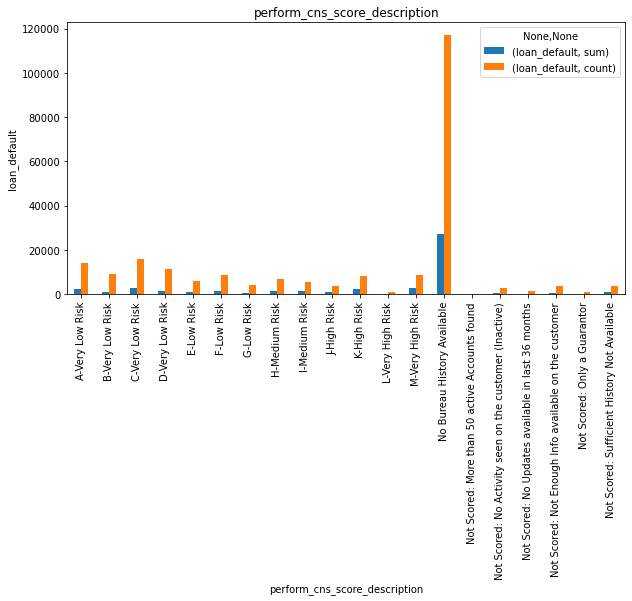

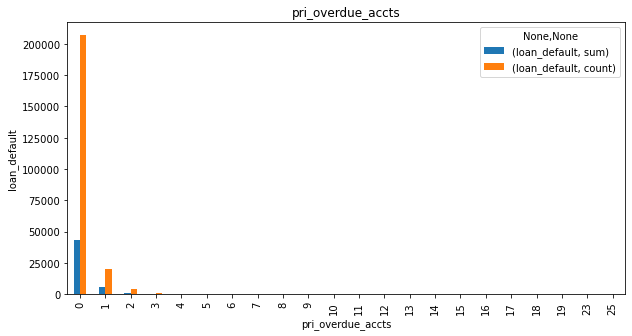

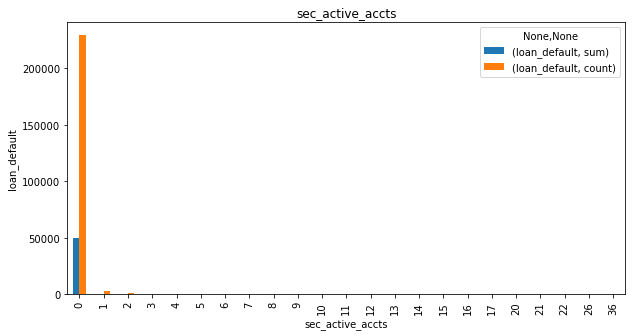

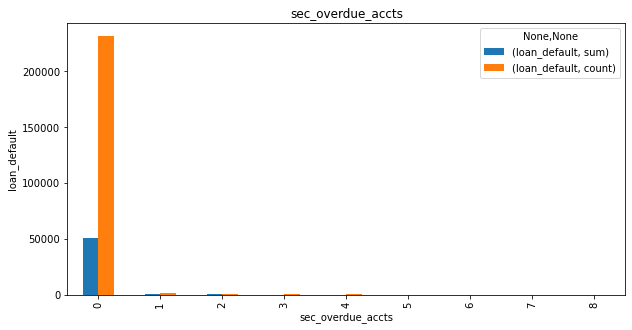

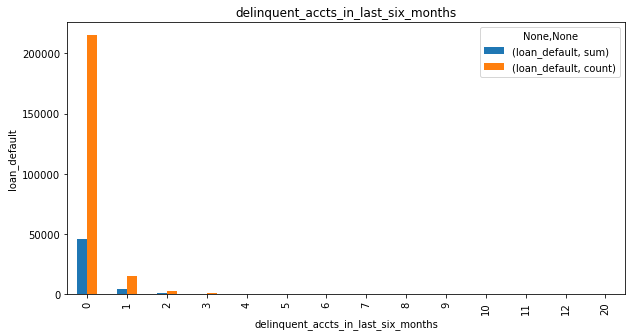

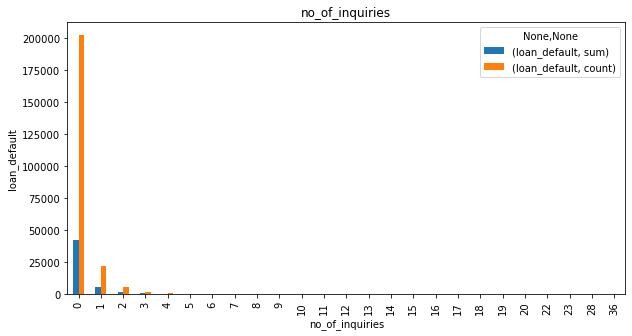

In [51]:
plt.rcParams["figure.figsize"] = [10, 5]
for i in categorical_data:
    data= loan_default_data.copy()
    data.groupby(i).agg({'loan_default':['sum',"count"]}).plot.bar()
    #data.groupby(i)['loan_default'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel("loan_default")
    plt.title(i)
    plt.show()

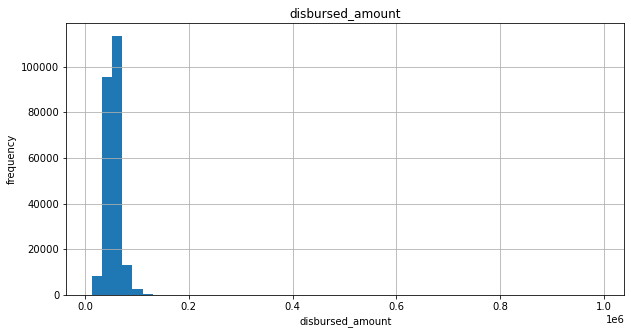

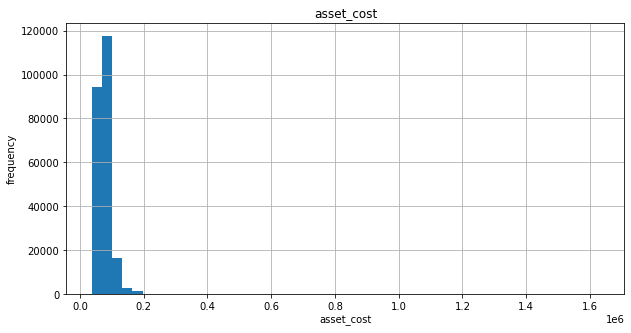

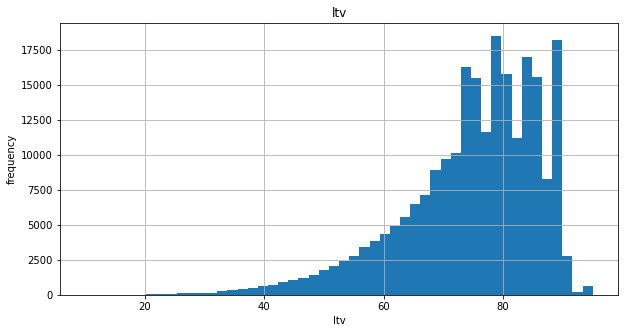

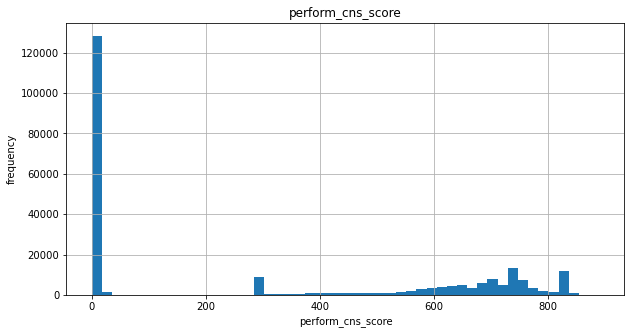

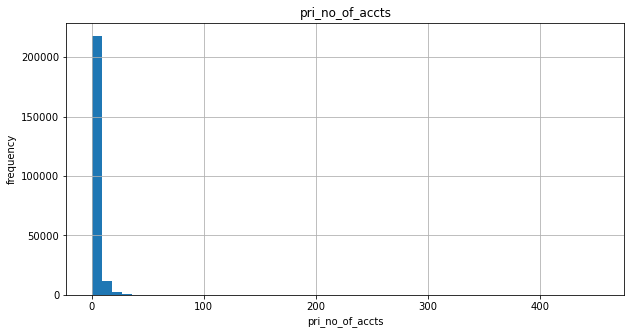

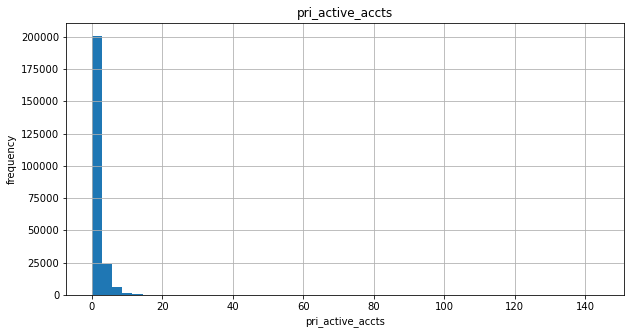

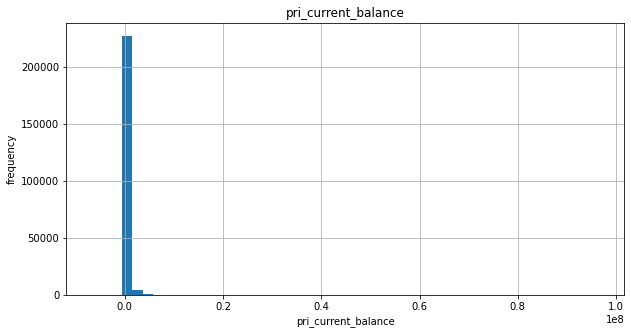

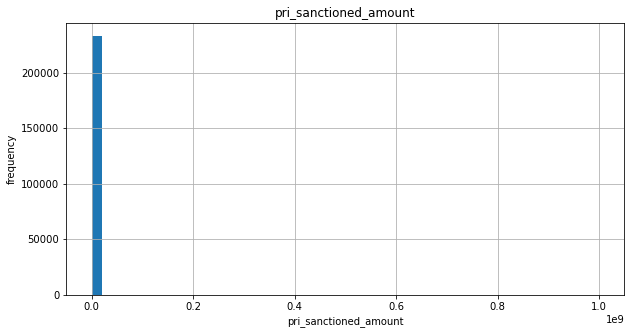

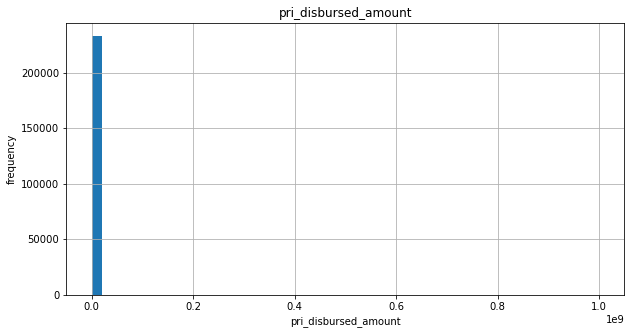

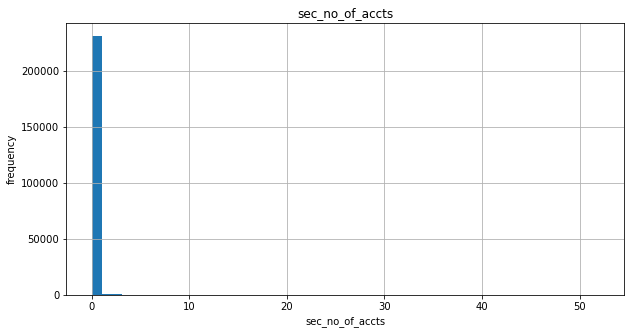

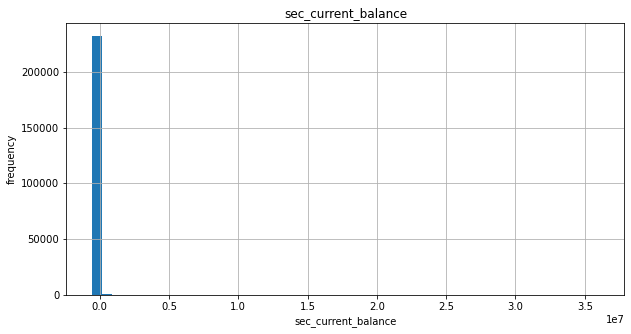

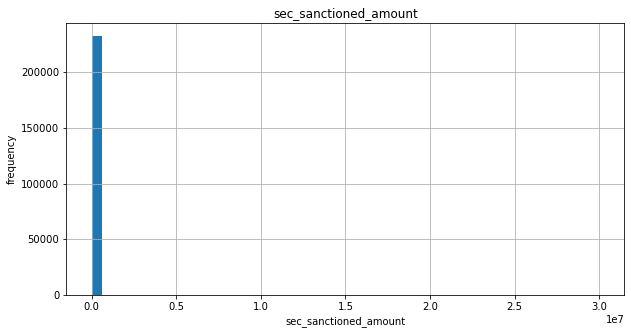

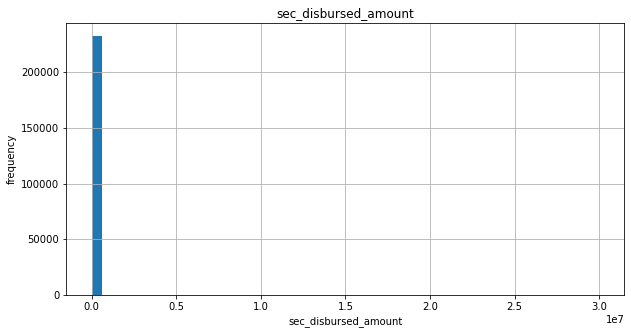

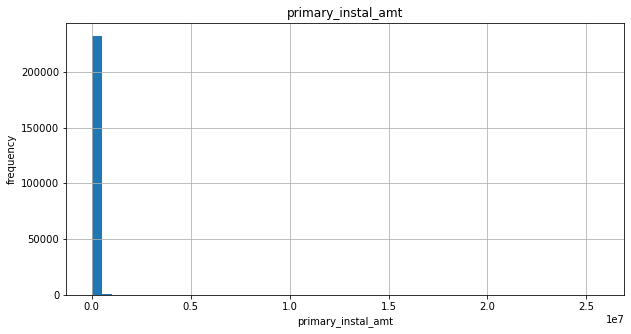

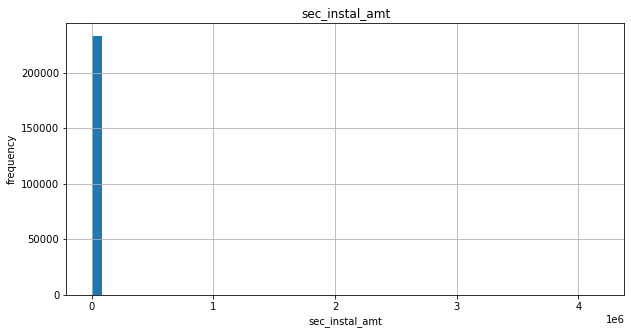

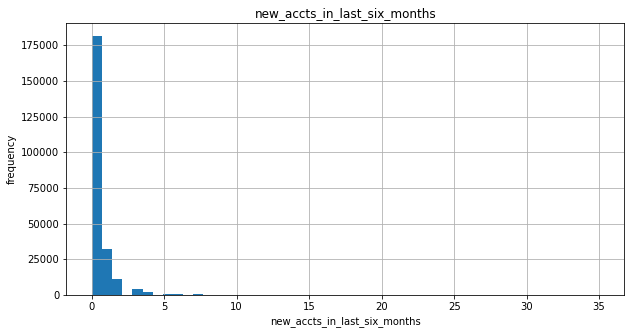

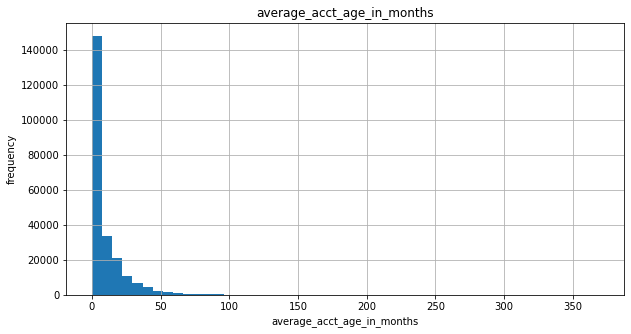

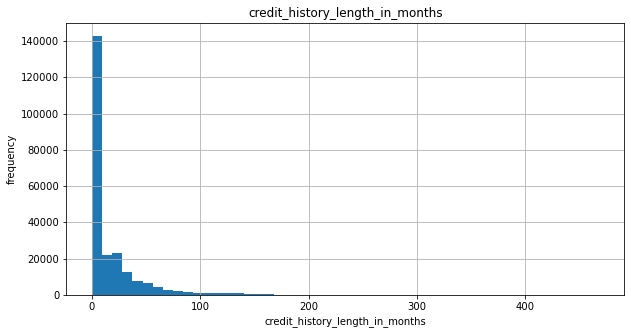

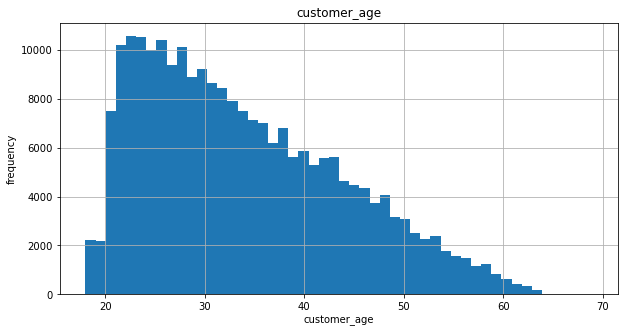

In [52]:
for i in numerical_data:
    data= loan_default_data.copy()
    data[i].hist(bins=50)
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.title(i)
    plt.show()

#### Outlier detection

In [53]:
### Outlier handling using IQR

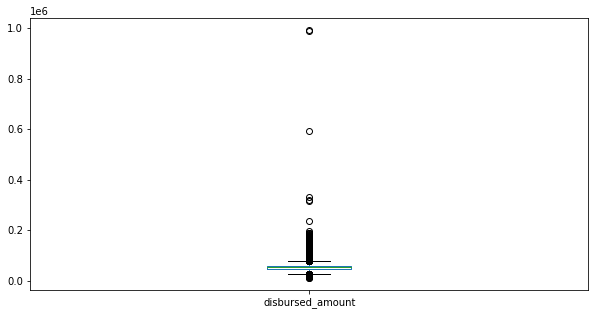

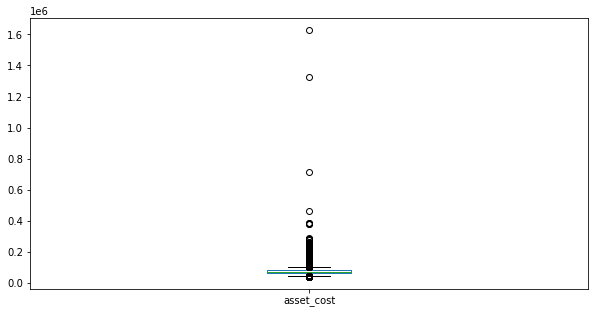

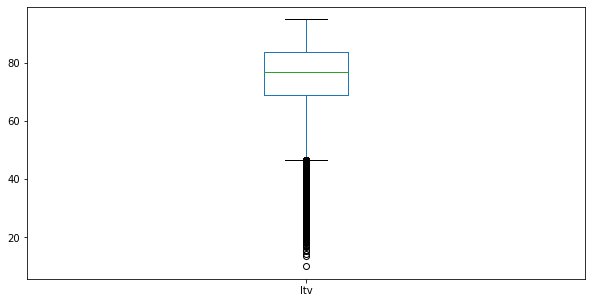

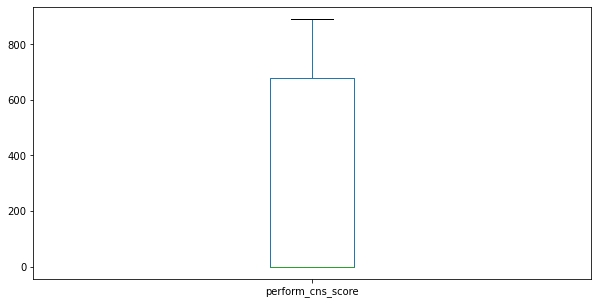

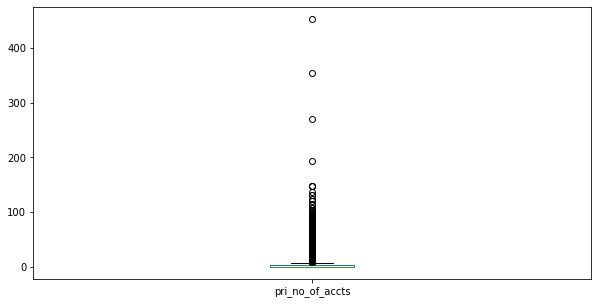

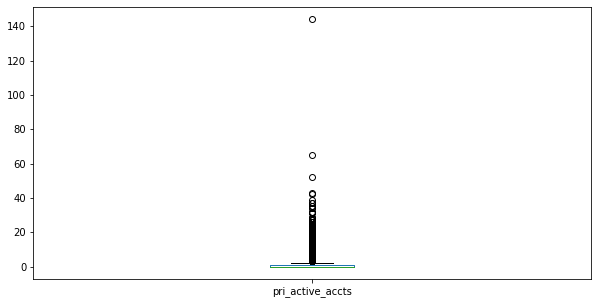

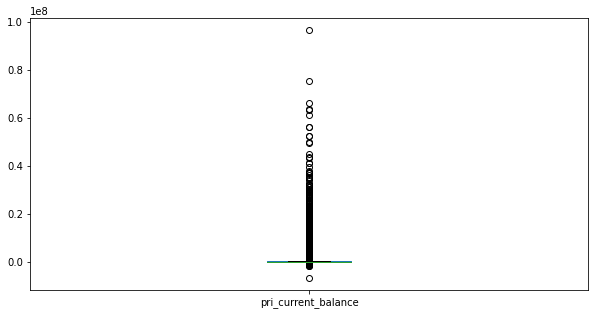

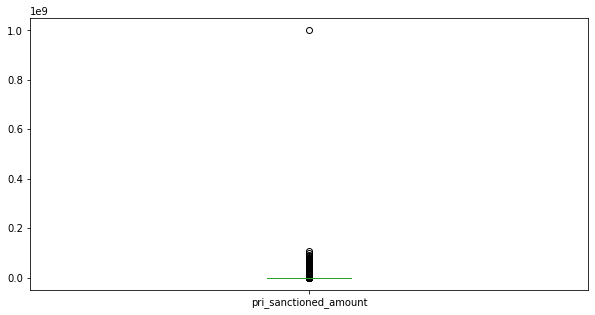

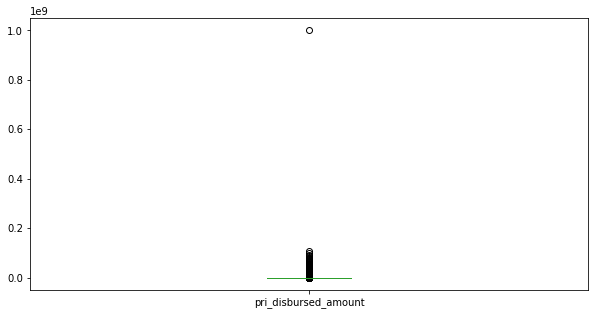

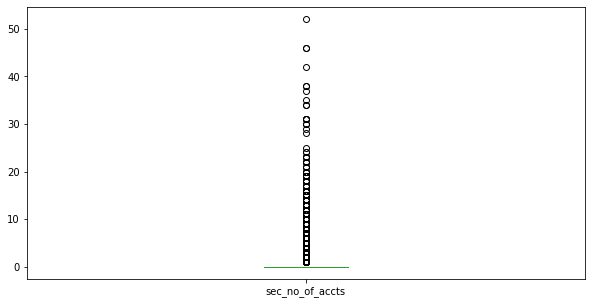

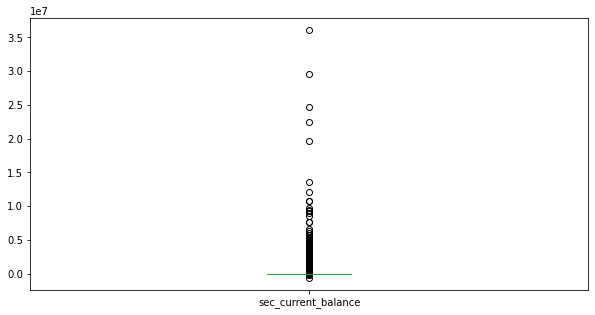

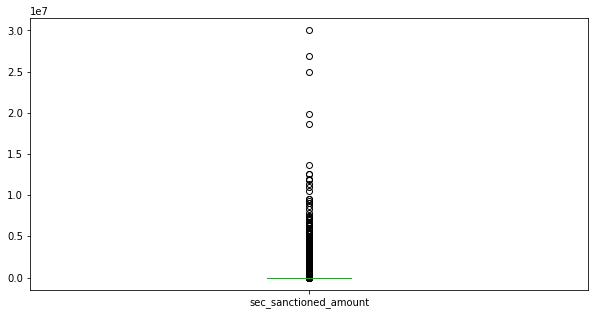

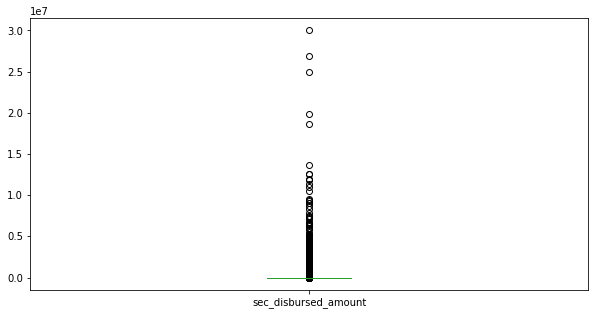

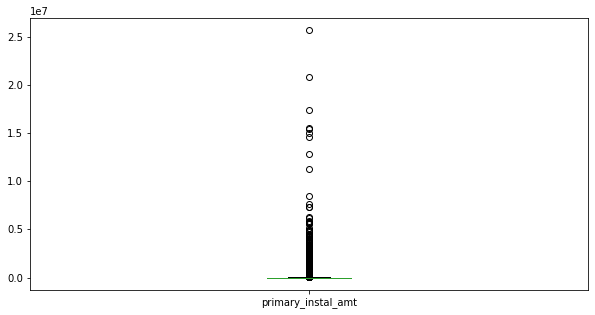

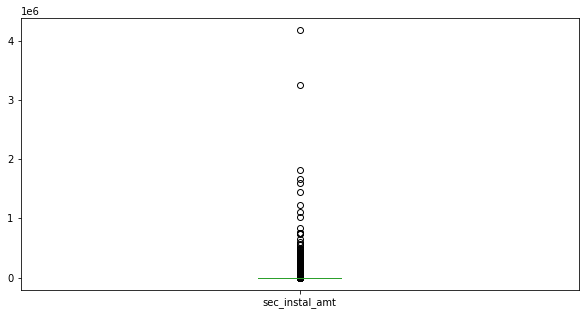

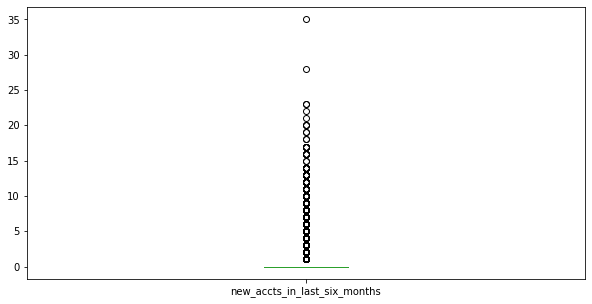

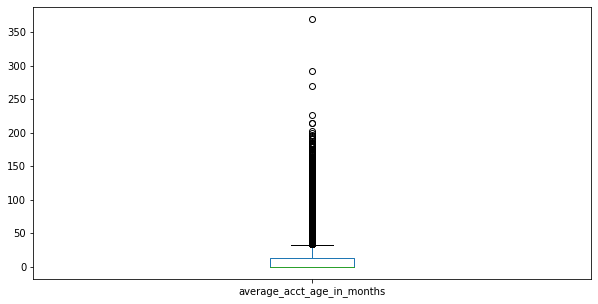

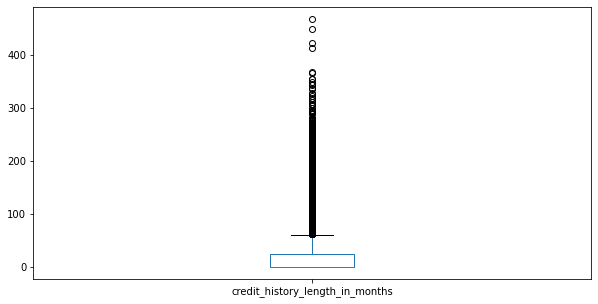

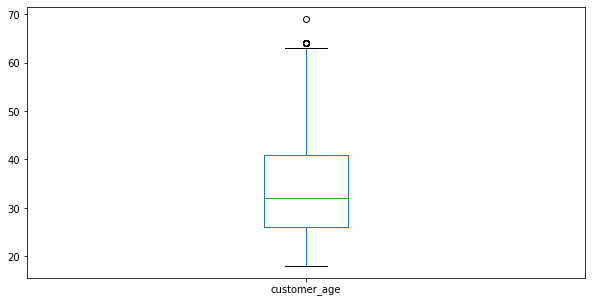

In [54]:
plt.rcParams["figure.figsize"] = [10, 5]
data= loan_default_data.copy()
for i in numerical_data:
    data[i].plot.box()
    plt.show()

In [55]:
data= loan_default_data.copy()
lis=['disbursed_amount','ltv','perform_cns_score']
for i in lis:
    print(i)
    percentile25 = data[i].quantile(0.25)
    percentile75 = data[i].quantile(0.75)
    q3, q1 = np.percentile(data[i], [75 ,25])
    iqr= q3-q1
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    data= data[(data[i]>lower_limit) & (data[i]<upper_limit)]
    print(data.shape)

disbursed_amount
(223285, 32)
ltv
(218454, 32)
perform_cns_score
(218454, 32)


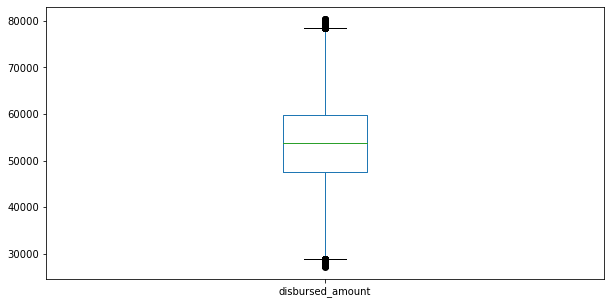

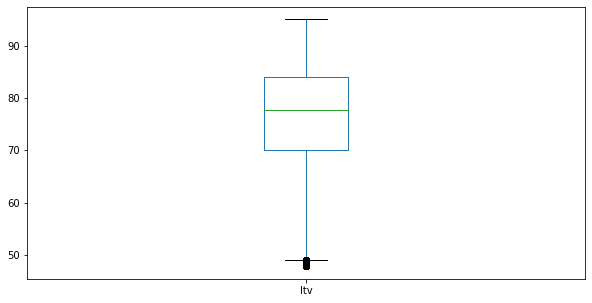

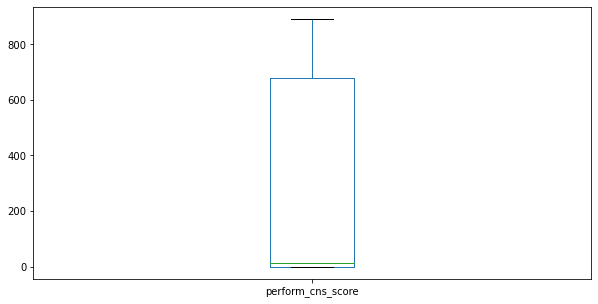

In [56]:
plt.rcParams["figure.figsize"] = [10, 5]
for i in lis:
    data[i].plot.box()
    plt.show()

In [57]:
loan_default_data= data.copy()
loan_default_data.shape

(218454, 32)

In [58]:
loan_default_data.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'employment_type', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score', 'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age_in_months', 'credit_history_length_in_months', 'no_of_inquiries', 'loan_default', 'customer_age'], dtype='object')

<AxesSubplot:xlabel='employment_type'>

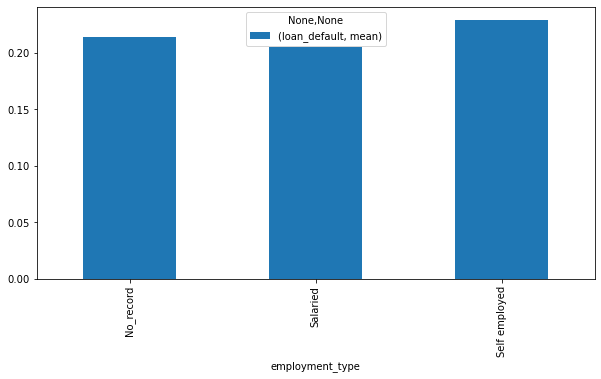

In [59]:
loan_default_data.groupby(['employment_type']).agg({'loan_default':['mean']}).plot.bar()

In [60]:
loan_default_data['loan_default']

0         0
1         1
2         0
3         1
4         1
         ..
233149    0
233150    0
233151    0
233152    0
233153    0
Name: loan_default, Length: 218454, dtype: int64

In [61]:
loan_default_data =pd.concat([loan_default_data.loc[:, loan_default_data.columns != 'loan_default'], loan_default_data['loan_default']],1)
loan_default_data.head()

,disbursed_amount,asset_cost,ltv,employment_type,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age_in_months,credit_history_length_in_months,no_of_inquiries,customer_age,loan_default
0,50578,58400,89.55,Salaried,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0
1,47145,65550,73.23,Self employed,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,33,1
2,53278,61360,89.63,Self employed,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0
3,57513,66113,88.48,Self employed,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,25,1
4,52378,60300,88.39,Self employed,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,41,1


In [62]:
feature_target_correlation= loan_default_data[loan_default_data.columns[:]].corr()['loan_default'].sort_values(ascending=False)
print("here is the correlation between loan_default and other variable: ") 
feature_target_correlation

here is the correlation between loan_default and other variable: 


loan_default                           1.000000
ltv                                    0.097880
disbursed_amount                       0.084933
voterid_flag                           0.045016
no_of_inquiries                        0.043556
pri_overdue_accts                      0.039706
delinquent_accts_in_last_six_months    0.034428
asset_cost                             0.015419
pan_flag                               0.002021
sec_instal_amt                        -0.001330
sec_overdue_accts                     -0.001563
sec_current_balance                   -0.005335
sec_active_accts                      -0.005729
driving_flag                          -0.005766
sec_disbursed_amount                  -0.006074
sec_sanctioned_amount                 -0.006188
passport_flag                         -0.007482
sec_no_of_accts                       -0.008223
pri_disbursed_amount                  -0.010992
pri_sanctioned_amount                 -0.011126
primary_instal_amt                    -0

##### There is some sort of relation between out target variable 
- +ve ltv & disbursed amount
- -ve between cns score 

##### Finding correlation within features

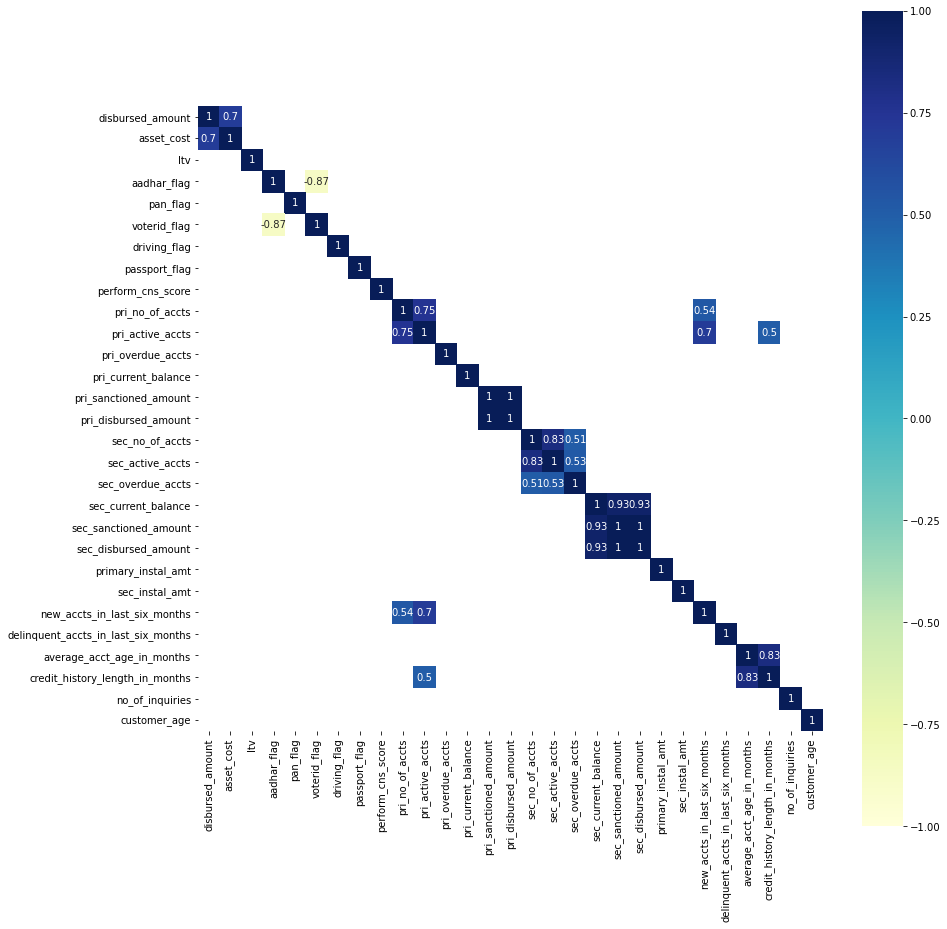

In [63]:
corrmat =loan_default_data.drop(["loan_default"],1).corr()
f, ax = plt.subplots(figsize=(14, 15))
sns.heatmap(corrmat[(corrmat>0.5) | (corrmat <-0.4)],vmin=-1, vmax=1, square=True,cmap="YlGnBu",annot=True);

#### Hence we can conclude thefollowing from the plot above

- strong realtion between sec_current_balance , sec_santioned_balance , sec_disbursed_balance 
- strong realtion between pri_santioned_amount , pri_disbursed_amount 

<b>Conclusion :</b>  keep only one and drop the rest to escape curse of dimensionality.

In [64]:
loan_default_data.drop(['pri_sanctioned_amount','sec_current_balance', 'sec_sanctioned_amount'],1,inplace=True) 

##### Checking for imbalance dataset


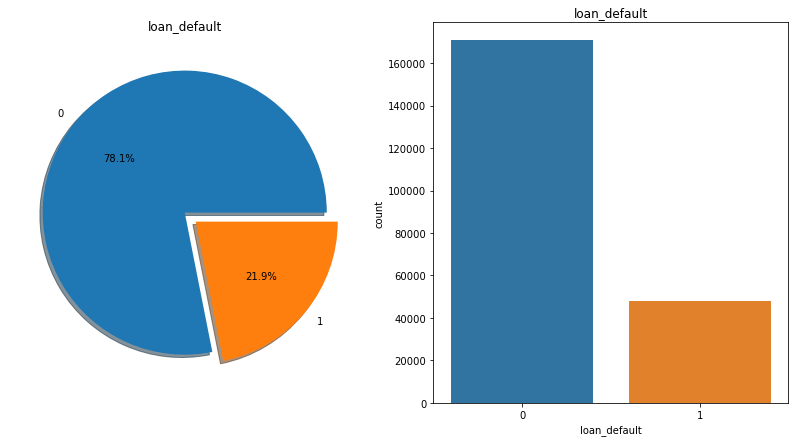

In [65]:
f,ax=plt.subplots(1,2,figsize=(14,7))
loan_default_data.loan_default.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('loan_default')
ax[0].set_ylabel('')
sns.countplot('loan_default',data=loan_default_data,ax=ax[1])
ax[1].set_title('loan_default')
plt.show()

##### Conclution from the above fig is that out data is highly imbalanced 

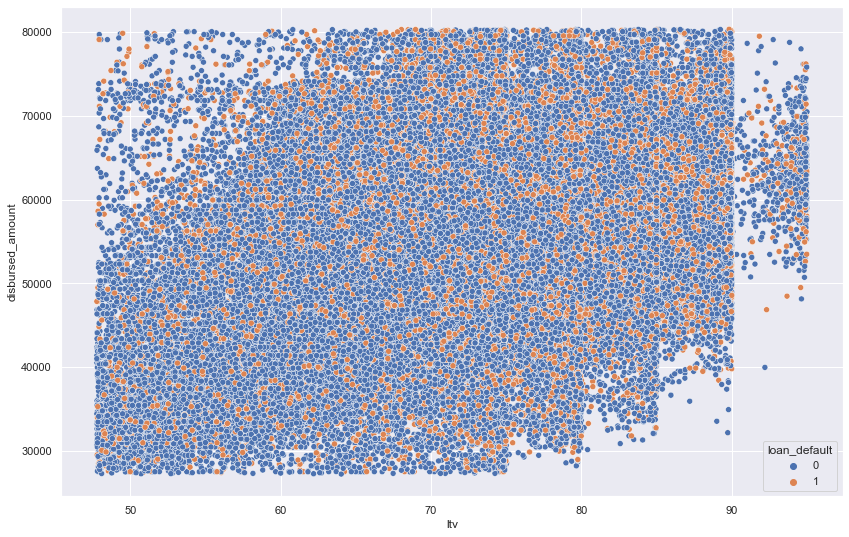

In [66]:
sns.set(rc={'figure.figsize':(14,9)})
sns.scatterplot(data=loan_default_data, x="ltv",y="disbursed_amount", hue="loan_default")
plt.show()
#No clear evidence can be found

In [67]:
data_copy= loan_default_data.copy()

In [68]:
binn= [10,20,30,40,50,60,70,80,90,100]
labell= ['10-20','21-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
loan_default_data['ltv']=pd.cut(x=loan_default_data.ltv, bins= binn, labels=labell, right= False)

In [69]:
display(pd.crosstab(loan_default_data.ltv, loan_default_data.loan_default,margins=True) )
print("-----------------------------------------")
display(pd.crosstab(loan_default_data.ltv, loan_default_data.loan_default,normalize='index') )

loan_default,0,1,All
ltv,,,
40-50,1585,239,1824
50-60,13716,2240,15956
60-70,30379,6286,36665
70-80,64611,17972,82583
80-90,59430,20805,80235
90-100,919,272,1191
All,170640,47814,218454


-----------------------------------------


loan_default,0,1
ltv,,
40-50,0.868969,0.131031
50-60,0.859614,0.140386
60-70,0.828556,0.171444
70-80,0.782377,0.217623
80-90,0.740699,0.259301
90-100,0.771620,0.228380


In [70]:
data[data['perform_cns_score']>300]

,disbursed_amount,asset_cost,ltv,employment_type,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age_in_months,credit_history_length_in_months,no_of_inquiries,loan_default,customer_age
1,47145,65550,73.23,Self employed,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,1,33
3,57513,66113,88.48,Self employed,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,8,15,1,1,25
5,54513,61900,89.66,Self employed,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,21,24,0,0,28
8,53713,61973,89.56,Self employed,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,56,56,1,0,27
9,52603,61300,86.95,Salaried,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,19,19,0,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233145,49803,66973,76.15,Self employed,1,0,0,0,0,690,E-Low Risk,7,4,0,13064,85629,80226,0,0,0,0,0,0,1672,0,2,0,9,30,1,0,33
233146,38439,52965,74.58,Self employed,1,0,0,0,0,738,C-Very Low Risk,2,2,0,7001,14839,14839,0,0,0,0,0,0,0,0,2,0,3,3,0,0,36
233147,72623,105405,69.73,Salaried,1,0,0,0,0,755,C-Very Low Risk,4,4,0,201422,276624,237977,0,0,0,0,0,0,0,0,1,0,9,12,0,0,29
233149,63213,105405,60.72,Salaried,0,0,1,0,0,735,D-Very Low Risk,4,3,0,390443,416133,416133,0,0,0,0,0,0,4084,0,0,0,21,39,0,0,30


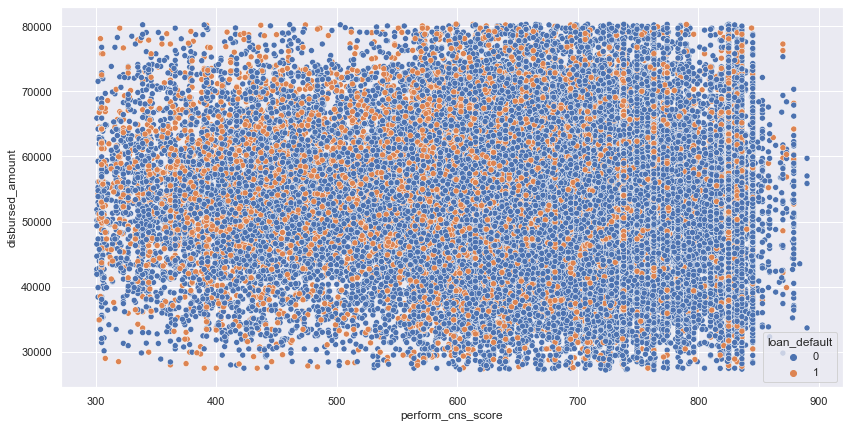

In [71]:
sns.set(rc={'figure.figsize':(14,7)})
sns.scatterplot(data=loan_default_data[loan_default_data['perform_cns_score']>300], x="perform_cns_score",y="disbursed_amount", hue="loan_default") 
plt.show()

#### As we can observe from the graph lower cns score tends to have high loan default

In [72]:
binn= [-1,100,200,300,400,500,600,700,800,900]
labell= ['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900']
loan_default_data['perform_cns_score'] = pd.cut(x=loan_default_data['perform_cns_score'],right=True , bins= binn, labels=labell)


<AxesSubplot:xlabel='perform_cns_score'>

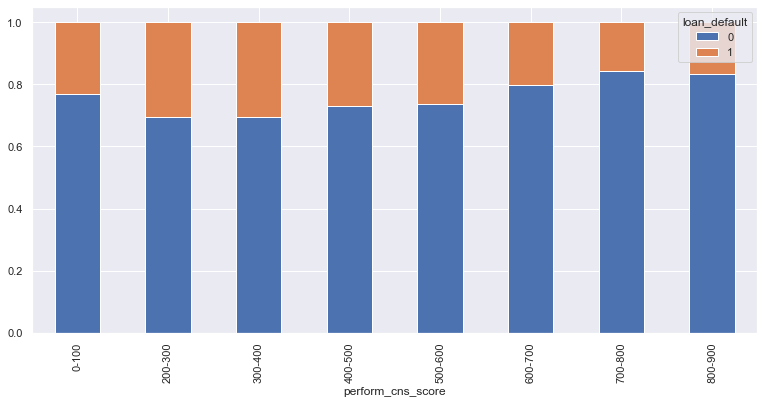

In [73]:
sns.set(rc={'figure.figsize':(13,6)})

pd.crosstab(loan_default_data['perform_cns_score'], loan_default_data['loan_default'],normalize="index").plot.bar(stacked=True)  # lower the score -> high default rate

<AxesSubplot:xlabel='customer_age'>

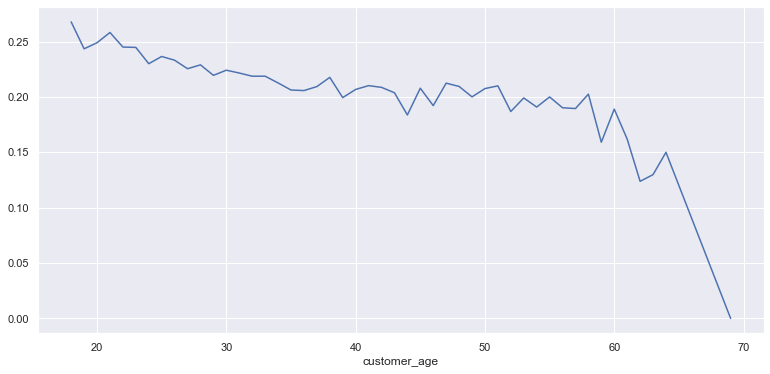

In [74]:
loan_default_data.groupby('customer_age')['loan_default'].mean().plot()

In [75]:
loan_default_data['delinquent_accts_in_last_six_months']= np.where(loan_default_data['delinquent_accts_in_last_six_months']>0,1,0)
pd.crosstab(loan_default_data['delinquent_accts_in_last_six_months'],loan_default_data.loan_default)

loan_default,0,1
delinquent_accts_in_last_six_months,,
0,158178,43145
1,12462,4669


In [76]:
pd.crosstab(loan_default_data['delinquent_accts_in_last_six_months'],loan_default_data.loan_default,normalize="index")

loan_default,0,1
delinquent_accts_in_last_six_months,,
0,0.785693,0.214307
1,0.727453,0.272547


In [77]:
loan_default_data.disbursed_amount.describe()

count    218454.000000
mean      53818.496315
std        9739.421914
min       27249.000000
25%       47482.000000
50%       53759.000000
75%       59865.000000
max       80310.000000
Name: disbursed_amount, dtype: float64

In [78]:
binn= [20000,40000,60000,85000]
labell= ['20000-40000','40000-60000','60000-85000']
loan_default_data['disbursed_amount'] = pd.cut(x=loan_default_data['disbursed_amount'],right=True , bins= binn, labels=labell)


In [79]:
loan_default_data.groupby(['disbursed_amount','ltv']).agg({'loan_default':['mean','count']}).reset_index().\
                    sort_values(['disbursed_amount','ltv'],ascending=[True,False]).groupby('disbursed_amount').head(2)

disbursed_amount     ltv loan_default       
                                    mean  count
8       20000-40000  90-100     0.000000      1
7       20000-40000   80-90     0.249412    425
17      40000-60000  90-100     0.266846    371
16      40000-60000   80-90     0.256049  54681
26      60000-85000  90-100     0.211233    819
25      60000-85000   80-90     0.266545  25129

#### Its clear from above figure that ltv above 80 tends to have higher default rates

In [80]:
d= data_copy[(data_copy.delinquent_accts_in_last_six_months==1) &
                  (data_copy.perform_cns_score <750) &
                 (data_copy.ltv >74)].reset_index(drop=True)
d.shape

(9293, 29)

In [81]:
print(f"{round(d.loan_default.mean(),2)}% default rate for this category")

0.29% default rate for this category


### Conclusion from Initial EDA :
- The following combinations above tends to give higher default rates
- so delinquent_accts_in_last_six_months, perform_cns_score & ltv has proven to be important factor at our initial Analysis